# Historical Distribution of Incomes by Race and Ethnicity

## Intro
It is the second part of the project, in which I analyze the Census data on poverty and income. In this part, I explore the data on historical income distribution in the United States (the latest Census data available is for 2021).

#### Data
The table we work with contains the historical income distribution along with median and mean incomes for four groups of origins – white, Black, Asian, and Native American as well as for all races overall (groups of mixed origin are not included). The incomes are adjusted in 2021 US dollars.
<br>

The income distribution is divided into nine groups by the following extreme points (in USD):
- under 15.000 a year, 

- between 15,000 and 24,999

- between 25,000 and 34,999

- between 35,000 and 49,999

- between 50,000 and 74,999

- between 75,000 and 99,999

- between 100,000 and 149,999

- between 150,000 and 199,999

- over 200,000

For convenience, the column names in the DataFrame are rounded (e.g., 25k instead of 24,999).

#### Goals & Methods
The dataset holds two pieces of information – the percent distribution of incomes and median/average incomes. According to this, we set the following goals:
1. Explore the income distributions with a series of stacked bar charts and draw conclusions.
2. Show the changes in median incomes since the data started being collected.
3. Find the Pearson correlation coefficient to check if the changes are statistically significant.

## Load and Clean Data

#### Import libraries and custom cleaning functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from cleaning_census_data import extract_rows, change_dtypes

`extract_rows` – extract specified rows from the dataset. It will be used to create a number of smaller DataFrames withdrawn from the original set;<br>
`change_dtypes` – turn string values to NaNs and change all data types to float (turns every numeric to float and strings to NaN);<br>

#### Load Data

In [3]:
cols = ['year', 
          'under_15k', '15_to_25k', '25_to_35k', '35_to_50k', '50_to_75k', 
          '75_to_100k', '100_to_150k', '150_to_200k', 'over_200k', 
          'median_income', 'mean_income']

df = pd.read_excel('Data/d2_income_dist_by_group.xlsx', skiprows=4, usecols="A, D:M, O", names=cols).iloc[0:453]

# Clean the years
change_dtypes(df)

#### Split by origin

In [4]:
income_dist_all = extract_rows(df, 1, 58)
income_dist_white = extract_rows(df, 59, 117, 81)
income_dist_black = extract_rows(df, 195, 253, 217)
income_dist_asian = extract_rows(df, 277, 315, 299)
income_dist_native = extract_rows(df, 339, 377, 361)
income_dist_hispanic = extract_rows(df, 401, 459)

## Explore

### 1. Percent Distribution of Incomes for American Households across Five Race Groups

The first step is to create a stacked bar plot to display the percentile distribution of incomes for five race groups in 2021. First, we need our y-values which are percentiles for the groups (the year 2021). To get them, we iterate through two indices. The first one fetches values from the first rows of five race DataFrames (stored in a list). The second one assigns a corresponding percentile of a race group to the array. Then we transpose the array so each row would hold a percentile value of all the groups.

In [5]:
cols_pct = cols[1:-2]
df_list = [income_dist_white.iloc[0], income_dist_black.iloc[0], income_dist_asian.iloc[0], income_dist_native.iloc[0], income_dist_hispanic.iloc[0]]
y_values = np.zeros(shape=(5, 9))
for x in range(len(df_list)):
    for i in range(len(cols_pct)):
        this_col = cols_pct[i]
        y_values[x][i] = df_list[x][this_col]

y_values = y_values.T
print(y_values)

[[ 8.2 15.9  7.8 14.8 11.2]
 [ 7.6 11.7  6.  11.5  8.3]
 [ 7.6 10.   5.3  9.   9.4]
 [10.8 13.4  6.6 12.9 13.9]
 [16.2 17.  13.4 17.9 18.4]
 [12.3 10.4 10.  12.1 12. ]
 [16.6 11.4 17.7 10.6 14.3]
 [ 8.6  4.6 12.2  5.3  5.9]
 [12.1  5.7 21.1  5.9  6.6]]


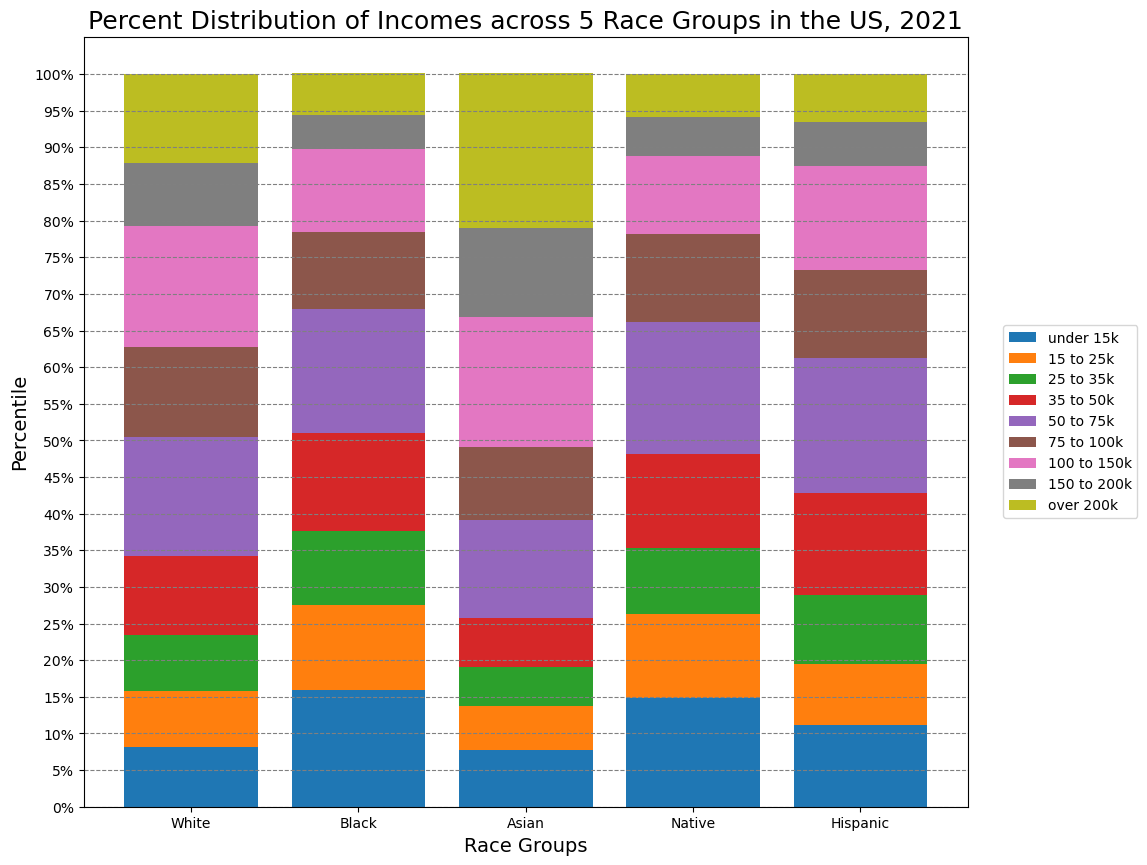

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 10))

# There are 5 x values corresponding to 5 race groups
x_values = range(5)
bottom = 0

# Create 5 stacked bars with 9 colors (for 9 distribution percentile)
for i in range(y_values.shape[0]):
    plt.bar(x_values, y_values[i], bottom = bottom)
    bottom += y_values[i]

# Set the y-label (all the percentiles sum up tp 100%) and the x-label
yticks = np.arange(0,101,5)
ylabels = [f'{i}%' for i in yticks]
plt.yticks(yticks, ylabels)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.set_xticks([x for x in x_values])
ax.set_xticklabels(['White', 'Black', 'Asian', 'Native', 'Hispanic'])


# Setting a legend. For that, we clean and use the cols_pct variable
# To place the legend outside of the plot, shrink the size of the plot (ax.set_position) 
# and use the bbox_to_anchor that allows choosing arbitrary location of the legend
legend = [i.replace('_', ' ') for i in cols_pct]
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.95, pos.height])
ax.legend(legend, loc='center right', bbox_to_anchor=(1.2, 0.5))

# Title, x and y labels
plt.title("Percent Distribution of Incomes across 5 Race Groups in the US, 2021", fontsize = 18)
plt.xlabel("Race Groups", fontsize = 14)
plt.ylabel("Percentile", fontsize = 14)

plt.show()

With this plot, we can see differences in the welfare of different race groups. <br>
For example, the first four percentiles take up more than 50% of the bar in the Black group and only 25% in the Asian group. It means that half of the Black population and a quarter of the Asian population earns 50,000 USD or less. <br>
At the same time, more than 50% of Asian Americans have an income of more than 100,000 USD (compared to a little more than 20% for Black people and Native Americans).

### 2. Historical Median Income across Five Race Groups

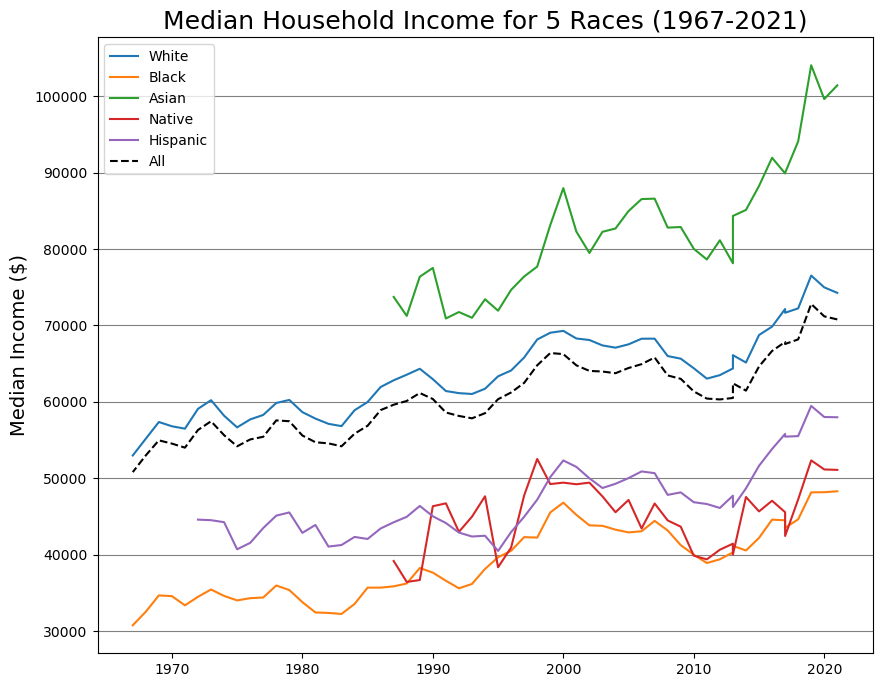

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 8))

df_list = [income_dist_white, income_dist_black, income_dist_asian, income_dist_native, income_dist_hispanic]
origin_list = ['White', 'Black', 'Asian', 'Native', 'Hispanic', 'All']

for data in df_list:
    plt.plot(data['year'], data['median_income'])
    
plt.plot(income_dist_all['year'], income_dist_all['median_income'], linestyle='dashed', c='k')    
ax.yaxis.grid(color='gray')

plt.legend(origin_list)
plt.title('Median Household Income for 5 Races (1967-2021)', fontsize=18)
plt.ylabel('Median Income ($)', fontsize=14)
plt.show()

From the chart, we can see that the incomes have been steadily growing for most of the groups and overall. <br>
For the Native American, their median household income is the most flactuatng, It was two times below 40,000 and above 50,000 USD over the course of 30 years. <br>
The main evidence we can draw out from the chart is – again – stark inequality between different races. Incomes of white people has been consistently more than 1.5 times bigger than of Black people. 

### 3. Change of Median Income over Time
Lastly, we run the Pearson correlation test to check if there is a linear correlation between a year and its median income for the groups. <br>
In the first part of the project, we also used the Mann-Kendall Test, but the results were practically similar for both tests, so I decided that one test was sufficient. 

In [8]:
for i in range(len(df_list)):
    r, p = stats.pearsonr(df_list[i]['year'], df_list[i]['median_income'])
    print(f"For people of {origin_list[i]} origin, Pearson correlation is {np.round(r, 4)}, p-value is close to {np.round(p, 4)}.")
    if p > 0.05:
        print("\t...The median income for this group is probably unchanged.")

For people of White origin, Pearson correlation is 0.8924, p-value is close to 0.0.
For people of Black origin, Pearson correlation is 0.8659, p-value is close to 0.0.
For people of Asian origin, Pearson correlation is 0.8379, p-value is close to 0.0.
For people of Native origin, Pearson correlation is 0.2925, p-value is close to 0.079.
	...The median income for this group is probably unchanged.
For people of Hispanic origin, Pearson correlation is 0.7924, p-value is close to 0.0.


Visualization and statistical tests show that the incomes have been rising for all the groups, but Native Americans (remember that the income data is adjusted to inflation). <br>
As for the situation with Native Americans, it is important to note that the correlation test considers the data from all the years. So the results tell us more that there is little or no correlation between year and income, not that in 2021 incomes of Indigenous people are the same as in 1990. We can see that it was about 10,000 dollars more in 2021 and that the incomes grow steadily since 2010.

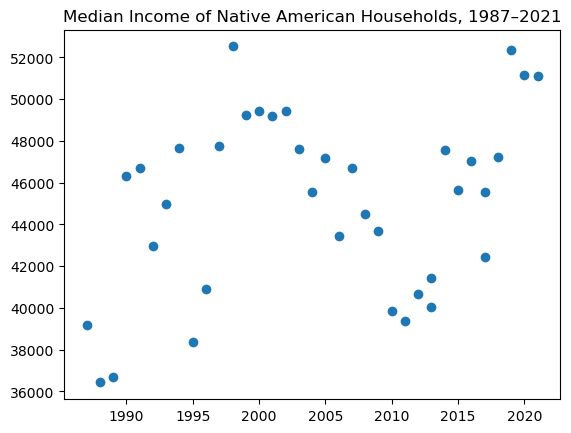

In [9]:
# No correlation in this groups's year and income on the scatterplot
plt.scatter(income_dist_native['year'], income_dist_native['median_income'])
plt.title('Median Income of Native American Households, 1987–2021')
plt.show()

## Conclusion
#### Key findings
1) The data shows the unequal distribution of incomes for different groups of origin. For example, roughly 50% of white households earn more than $75,000 – with only 32% of Black, 34% of Native American, and 39% of Hispanic households having the same characteristic.

2) Nonetheless, incomes are rising consistently for most of the groups. The situation is a bit more unclear (fluctuating) for the Indigenous households, but they have steady growth in the last ten years.

3) Despite this general growth, there is virtually no change in the relative position of these groups to each other. For example, white households had more than 15,000 (2021 US dollars) incomes than Hispanic ones both in 1972 and 2021.

4) There are certain trends in every group's income. All the groups experienced gradual fall or stagnation in their incomes throughout the 2000s and then had vigor growth in the 2010s.

#### What's done
1) Loaded data from an Excel table and cleaned it with two custom functions (loaded from a separate Python file).

2) Created five stacked bar charts to show the income distribution. For that, we created an array with y-values by iterating through the first rows of all datasets. Then we transposed this array to show percentiles of the same group on one bar.<br>
We created the bar chart with an axis object and also shrank it a little to display the legend right to the plot without overlapping.

3) Created a series of line charts to show the historical change in median income for all the groups separately and in general. 

4) Found Pearson's r to be sure if there were a significant change in incomes.